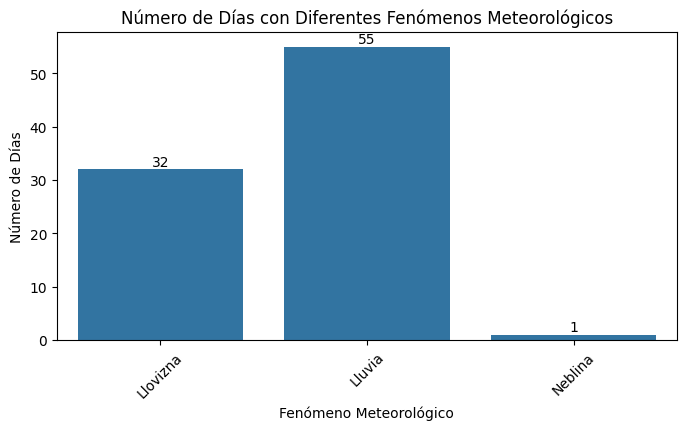

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
data = pd.read_csv('GCLP_All.csv')

# Convertir la columna dateTime a tipo datetime para extraer la fecha (sin tiempo)
data['dateTime'] = pd.to_datetime(data['dateTime']).dt.date

# Agrupar por fecha y fenómeno, contando las ocurrencias diarias de cada fenómeno
daily_phenomena = data.groupby(['dateTime', 'phenomenon1']).size().reset_index(name='counts')

# Agrupar por fenómeno para contar cuántos días distintos tuvieron cada tipo de fenómeno
phenomenon_counts = daily_phenomena.groupby('phenomenon1').size()

# Gráfico de barras
plt.figure(figsize=(8, 4))
bars = sns.barplot(x=phenomenon_counts.index, y=phenomenon_counts.values)
plt.title('Número de Días con Diferentes Fenómenos Meteorológicos')
plt.xlabel('Fenómeno Meteorológico')
plt.ylabel('Número de Días')
plt.xticks(rotation=45)

# Añadir etiquetas a cada barra
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
             ha='center', va='bottom', color='black')

plt.show()
